In [8]:
# Cell 1 - Import Libraries

In [ ]:
# Cell 1 - Import Libraries

In [12]:
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.datasets import mnist
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Flatten, Dropout
from tensorflow.keras.utils import to_categorical


# Cell 2 - Load Data

In [13]:
# Load MNIST dataset
(X_train, y_train), (X_test, y_test) = mnist.load_data()

# Normalize the pixel values (scale to range [0,1])
X_train = X_train.astype('float32') / 255
X_test = X_test.astype('float32') / 255

# Reshape to include channel dimension (needed for CNN)
X_train = X_train.reshape(X_train.shape[0], 28, 28, 1)
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

# Convert labels to categorical format
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

print('Training data shape:', X_train.shape)
print('Training labels shape:', y_train.shape)

Training data shape: (60000, 28, 28, 1)
Training labels shape: (60000, 10)


# Cell 3 - Build Model

In [14]:
model = Sequential([
    # First Convolutional Layer
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(28, 28, 1)),
    MaxPooling2D(pool_size=(2, 2)),

    # Second Convolutional Layer
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),

    # Flatten layer to convert 2D features to a vector
    Flatten(),

    # Dense layers for classification
    Dense(128, activation='relu'),
    Dropout(0.25),
    Dense(10, activation='softmax')
])

# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# Display model summary
model.summary()

# Train the model
history = model.fit(X_train, y_train,
                    batch_size=128,
                    epochs=10,
                    verbose=1,
                    validation_data=(X_test, y_test))

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d_4 (Conv2D)               │ (None, 26, 26, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_4 (MaxPooling2D)  │ (None, 13, 13, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_5 (Conv2D)               │ (None, 11, 11, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_5 (MaxPooling2D)  │ (None, 5, 5, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten_2 (Flatten)             │ (None, 1600)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 128)            │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 225,034 (879.04 KB)

 Trainable params: 225,034 (879.04 KB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 41s 73ms/step - accuracy: 0.8275 - loss: 0.5507 - val_accuracy: 0.9803 - val_loss: 0.0598
Epoch 2/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 29s 61ms/step - accuracy: 0.9766 - loss: 0.0758 - val_accuracy: 0.9867 - val_loss: 0.0450
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 27s 57ms/step - accuracy: 0.9837 - loss: 0.0525 - val_accuracy: 0.9902 - val_loss: 0.0341
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9868 - loss: 0.0402 - val_accuracy: 0.9892 - val_loss: 0.0304
Epoch 5/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 53ms/step - accuracy: 0.9902 - loss: 0.0314 - val_accuracy: 0.9906 - val_loss: 0.0296
Epoch 6/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 25s 54ms/step - accuracy: 0.9908 - loss: 0.0277 - val_accuracy: 0.9902 - val_loss: 0.0274
Epoch 7/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 26s 55ms/step - accuracy: 0.9919 - loss: 0.0233 - val_accuracy: 0.9911 - val_loss: 0.0293
Epoch 8/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.9937 - loss: 0.0208 - 

# Cell 4 - Evaluate the Model & Plot Training History

313/313 ━━━━━━━━━━━━━━━━━━━━ 4s 11ms/step - accuracy: 0.9877 - loss: 0.0382

Test accuracy: 0.9911


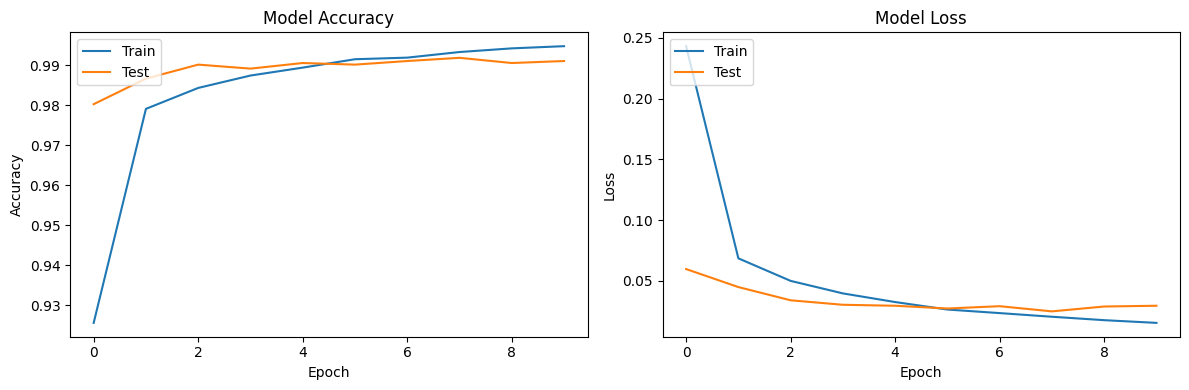

In [16]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print(f'\nTest accuracy: {test_accuracy:.4f}')

# Plot training history
plt.figure(figsize=(12, 4))

# Plot training & validation accuracy
plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

# Plot training & validation loss
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper left')

plt.tight_layout()
plt.show()

# Cell 5 - Function to Display Predictions on Test Data

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 516ms/step


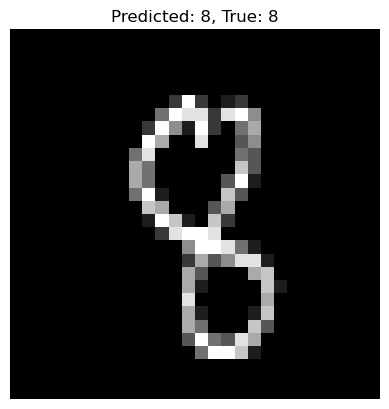

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 181ms/step


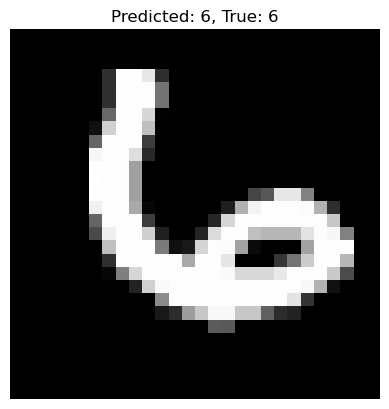

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 161ms/step


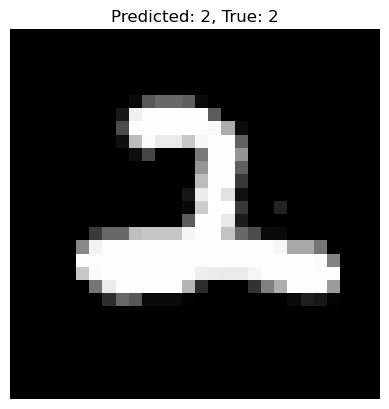

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 174ms/step


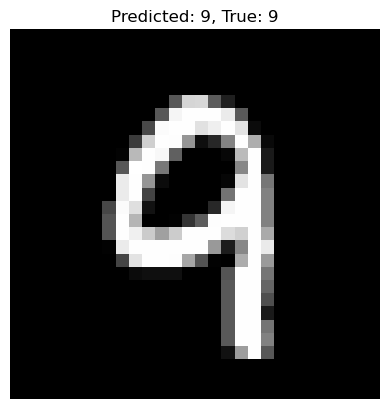

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 153ms/step


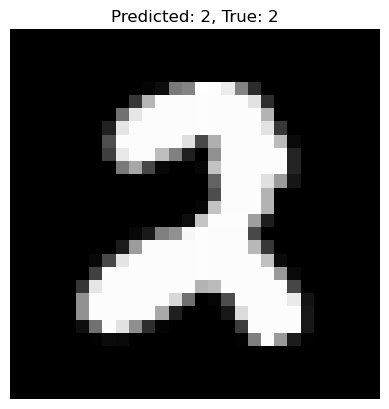

In [13]:
def show_prediction(idx):
    # Get the image and true label
    img = X_test[idx].reshape(28, 28)
    true_label = np.argmax(y_test[idx])

    # Get model prediction
    pred = model.predict(X_test[idx:idx + 1])
    pred_label = np.argmax(pred)

    # Plot the image
    plt.imshow(img, cmap='gray')
    plt.title(f'Predicted: {pred_label}, True: {true_label}')
    plt.axis('off')
    plt.show()

# Test with a few random examples
for _ in range(5):
    show_prediction(np.random.randint(0, len(X_test)))


# Cell 5 - Interactive Drawing Canvas for User Input

Predicted digit: 7


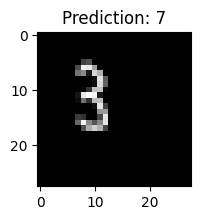

Predicted digit: 7


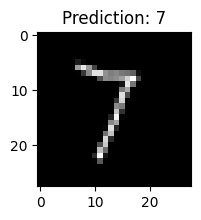

Predicted digit: 5


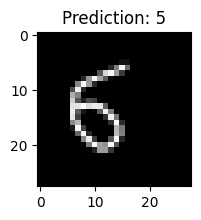

Predicted digit: 9


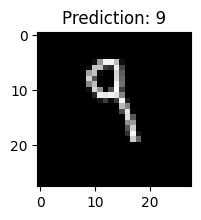

Predicted digit: 5


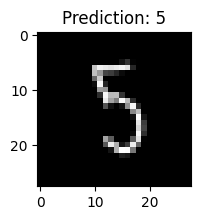

Predicted digit: 4


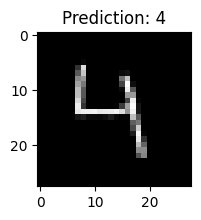

Predicted digit: 4


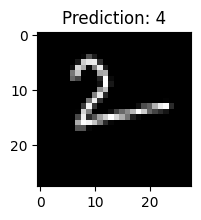

Predicted digit: 4


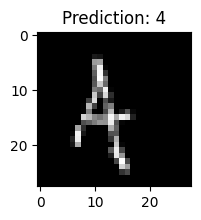

In [24]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Create a drawing canvas
canvas = np.zeros((400, 400), dtype=np.uint8)
drawing = False

def draw(event, x, y, flags, param):
    global drawing
    if event == cv2.EVENT_LBUTTONDOWN:
        drawing = True
    elif event == cv2.EVENT_MOUSEMOVE:
        if drawing:
            cv2.circle(canvas, (x, y), 8, 255, -1)
    elif event == cv2.EVENT_LBUTTONUP:
        drawing = False

# Create window and set callback
cv2.namedWindow('Draw Digit')
cv2.setMouseCallback('Draw Digit', draw)

def display_instructions(img):
    # Create a copy to avoid modifying the original
    display = img.copy()
    # Add text instructions
    cv2.putText(display, "Press 'p' to predict", (10, 20), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 255, 1)
    cv2.putText(display, "Press 'c' to clear", (10, 40), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 255, 1)
    cv2.putText(display, "Press 'q' to quit", (10, 60), cv2.FONT_HERSHEY_SIMPLEX, 0.5, 255, 1)
    return display

try:
    while True:
        # Create display with instructions
        display_canvas = display_instructions(canvas)
        cv2.imshow('Draw Digit', display_canvas)

        key = cv2.waitKey(1) & 0xFF

        if key == ord('p'):  # Press 'p' to predict
            # Preprocess the image
            resized = cv2.resize(canvas, (28, 28), interpolation=cv2.INTER_AREA)
            normalized = resized.astype('float32') / 255.0
            input_image = normalized.reshape(1, 28, 28, 1)

            # Make prediction
            pred = model.predict(input_image, verbose=0)  # Added verbose=0 to reduce output
            predicted_digit = np.argmax(pred)
            print(f"Predicted digit: {predicted_digit}")

            # Display with matplotlib
            plt.figure(figsize=(2, 2))
            plt.imshow(normalized, cmap='gray')
            plt.title(f'Prediction: {predicted_digit}')
            plt.show(block=False)  # Non-blocking to allow control to return

        elif key == ord('c'):  # Clear
            canvas = np.zeros((400, 400), dtype=np.uint8)

        elif key == ord('q') or key == 27:  # Quit (q or ESC)
            break

finally:
    # This ensures windows are properly destroyed
    cv2.destroyAllWindows()
    # Additional attempt to close windows in case the first one doesn't work
    for i in range(1, 5):
        cv2.waitKey(1)
